In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("train_BRCpofr.csv")
test=pd.read_csv("test_koRSKBP.csv")

test['cltv']=train['cltv'].mean()


In [3]:
sample_submission = test[['id','cltv']]

In [4]:
sample_submission.to_csv("sample_submission.csv",index=False)

In [5]:
train.shape , test.shape

((89392, 12), (59595, 12))

In [6]:
pd.set_option('display.max_columns',50)
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


# Preprocessing

In [7]:
# How many data-points and features?
train.shape

(89392, 12)

In [8]:
#. What are the number of rows and no. of cols & types of variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [9]:
#five-point summary for numerical variables
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


# Seperating categorical and Numerical data

In [10]:
train_num = train.select_dtypes(include=np.number)
train_cat = train.select_dtypes(include ='object')

In [11]:
train_cat.head(1)

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum


In [12]:
train_num.head(1)

,id,marital_status,vintage,claim_amount,cltv
0,1,1,5,5790,64308


In [13]:
#Checking Duplicated values
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
89387    False
89388    False
89389    False
89390    False
89391    False
Length: 89392, dtype: bool

In [14]:
#Summarize observations for categorical variables – no. of categories, % observations in each category

In [15]:
for col in train.columns:
    if train[col].dtypes=='object':
        print(col)
        print(train[col].nunique())
        print(train[col].value_counts(ascending=False,normalize=True)*100)

gender
2
Male      56.489395
Female    43.510605
Name: gender, dtype: float64
area
2
Urban    69.866431
Rural    30.133569
Name: area, dtype: float64
qualification
3
High School    51.735055
Bachelor       44.074414
Others          4.190532
Name: qualification, dtype: float64
income
4
5L-10L           58.971720
2L-5L            23.668785
More than 10L    15.285484
<=2L              2.074011
Name: income, dtype: float64
num_policies
2
More than 1    67.41431
1              32.58569
Name: num_policies, dtype: float64
policy
3
A    63.365849
B    27.558394
C     9.075756
Name: policy, dtype: float64
type_of_policy
3
Platinum    53.467872
Silver      23.503222
Gold        23.028906
Name: type_of_policy, dtype: float64


# Missing data

In [16]:
# checking for null values
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [17]:
train.isnull().sum()/len(train)*100

id                0.0
gender            0.0
area              0.0
qualification     0.0
income            0.0
marital_status    0.0
vintage           0.0
claim_amount      0.0
num_policies      0.0
policy            0.0
type_of_policy    0.0
cltv              0.0
dtype: float64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math

import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

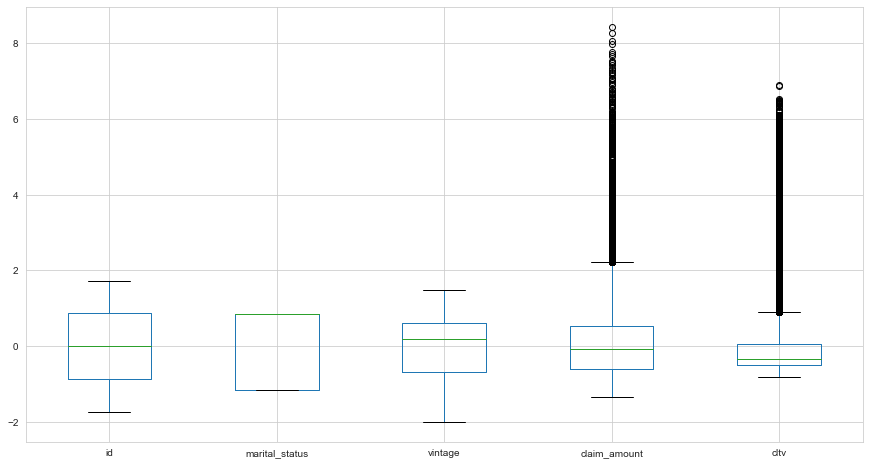

In [19]:
from scipy.stats import zscore
plt.figure(figsize=(15,8))
train.select_dtypes(np.number).apply(zscore).boxplot()
plt.show()


In [20]:
# we  have outliers in the data

In [21]:
#Outlier treatment

In [22]:
train.claim_amount.shape

(89392,)

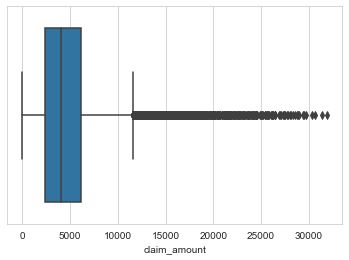

In [23]:
sns.boxplot(x = train['claim_amount'])
plt.show()

In [24]:
Q1 = train.claim_amount.quantile(0.25)
Q3 = train.claim_amount.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3688.0


In [25]:
train = train[~((train.claim_amount < (Q1 - 1.5 * IQR)) |(train.claim_amount > (Q3 + 1.5 * IQR)))]
train.claim_amount.shape

(87134,)

In [26]:
train.cltv.shape

(87134,)

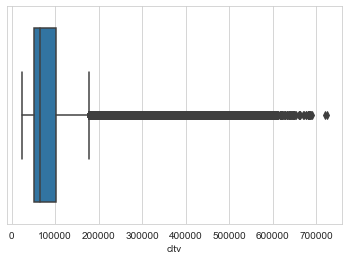

In [27]:
sns.boxplot(x = train['cltv'])
plt.show()

In [28]:
Q1 = train.cltv.quantile(0.25)
Q3 = train.cltv.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

50520.0


In [29]:
train = train[~((train.cltv < (Q1 - 1.5 * IQR)) |(train.cltv > (Q3 + 1.5 * IQR)))]
train.cltv.shape

(77358,)

In [30]:
#checking Is the data normally distributed

<Figure size 1440x720 with 0 Axes>

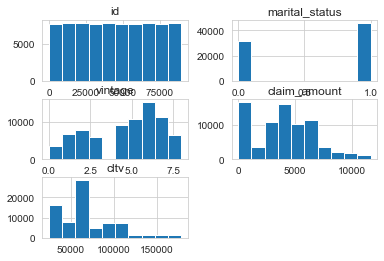

In [31]:
plt.figure(figsize=(20,10))
train.hist()
plt.show()

# Univariate Analysis 

In [32]:
train.claim_amount.value_counts().head()

0       16732
3834       31
3912       30
4006       30
4042       29
Name: claim_amount, dtype: int64

In [33]:
train.claim_amount.value_counts().tail()

9010     1
8729     1
10340    1
11062    1
9885     1
Name: claim_amount, dtype: int64

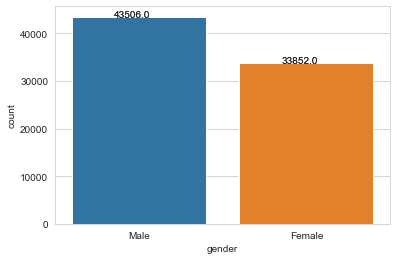

In [34]:
sns.countplot(x = 'gender',data = train)
ax = sns.countplot(x='gender', data=train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

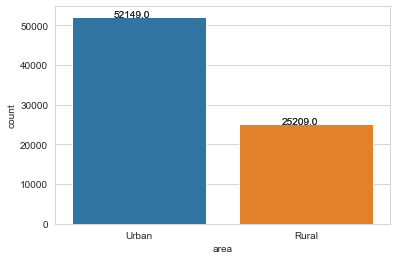

In [35]:
sns.countplot(x = 'area',data = train)
ax = sns.countplot(x='area', data=train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

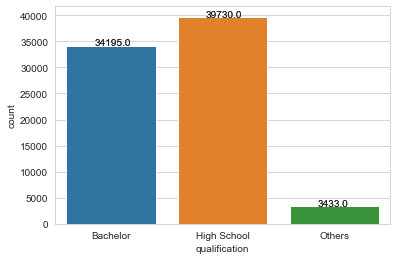

In [36]:
sns.countplot(x = 'qualification',data = train)
ax = sns.countplot(x='qualification', data=train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

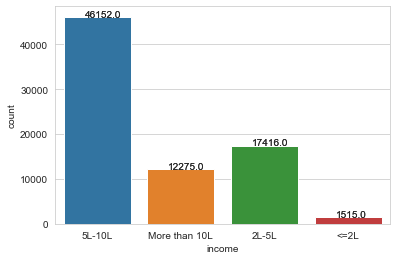

In [37]:
sns.countplot(x = 'income',data = train)
ax = sns.countplot(x='income', data=train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

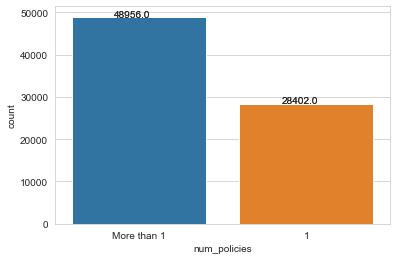

In [38]:
sns.countplot(x = 'num_policies',data = train)
ax = sns.countplot(x='num_policies', data=train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

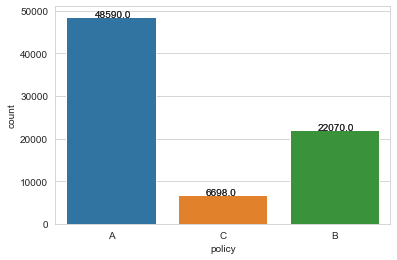

In [39]:
sns.countplot(x = 'policy',data = train)
ax = sns.countplot(x='policy', data=train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

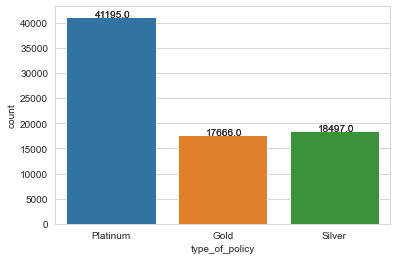

In [40]:
sns.countplot(x = 'type_of_policy',data = train)
ax = sns.countplot(x='type_of_policy', data=train)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Analysing the Target variable

1.0883237388004896


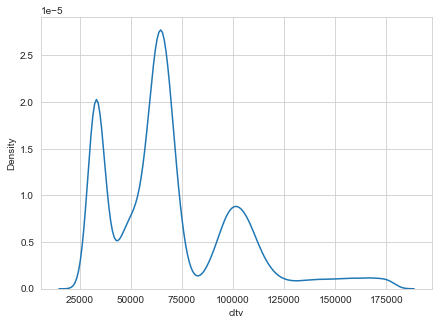

In [41]:
plt.rcParams["figure.figsize"]=(7,5)
print(train["cltv"].skew())
sns.kdeplot(train['cltv'])
plt.show()

In [42]:
#cltv is positively/Right Skewed

# Quantitative and Categorical Analysis

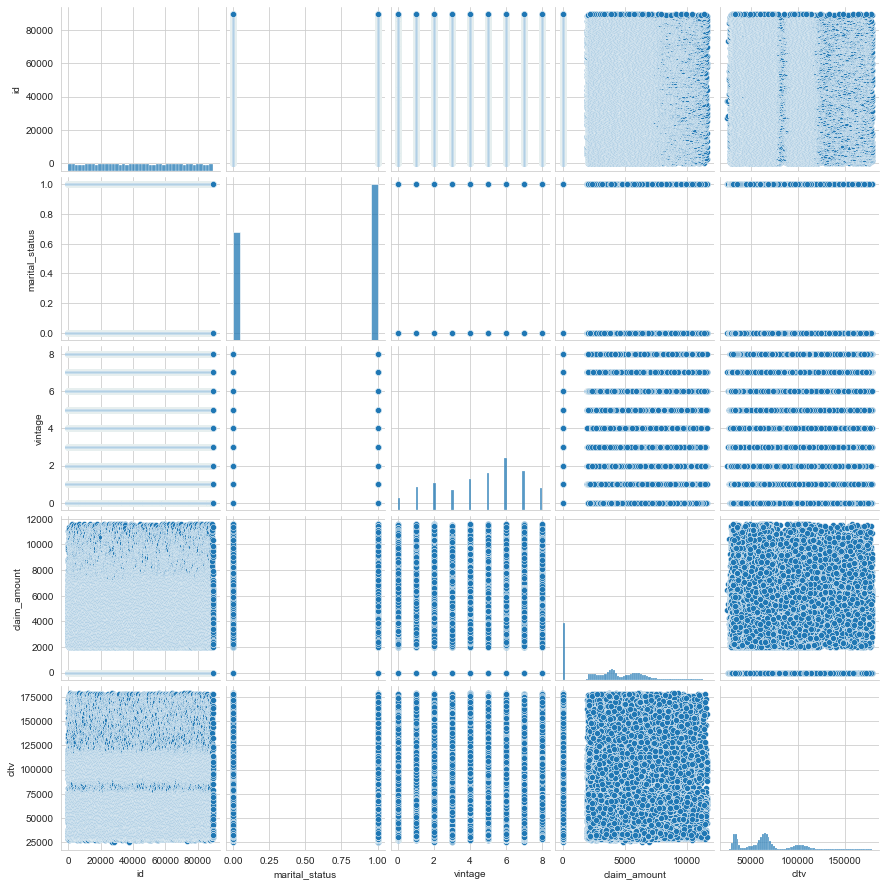

In [43]:
sns.pairplot(train)

# Bivariate Analysis

<AxesSubplot:xlabel='marital_status', ylabel='cltv'>

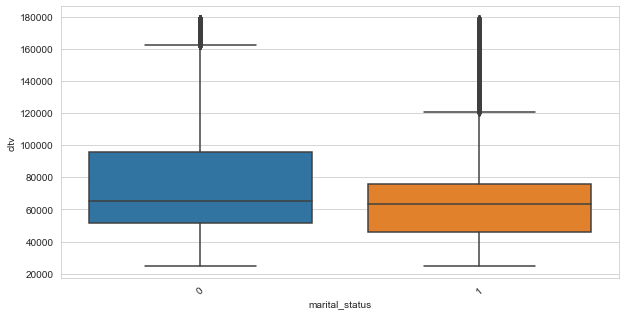

In [44]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.xticks(rotation=40)
sns.boxplot(data=train, x="marital_status", y="cltv")

<AxesSubplot:xlabel='vintage', ylabel='cltv'>

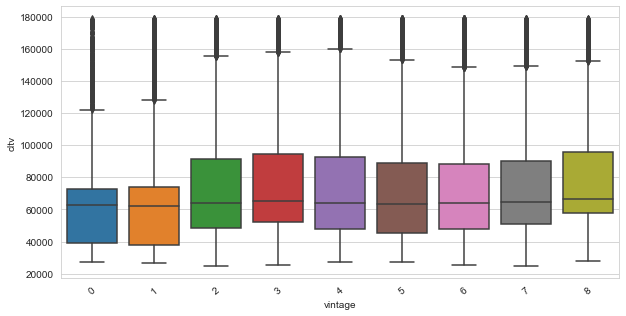

In [45]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.xticks(rotation=40)
sns.boxplot(data=train, x="vintage", y="cltv")

<AxesSubplot:xlabel='vintage', ylabel='cltv'>

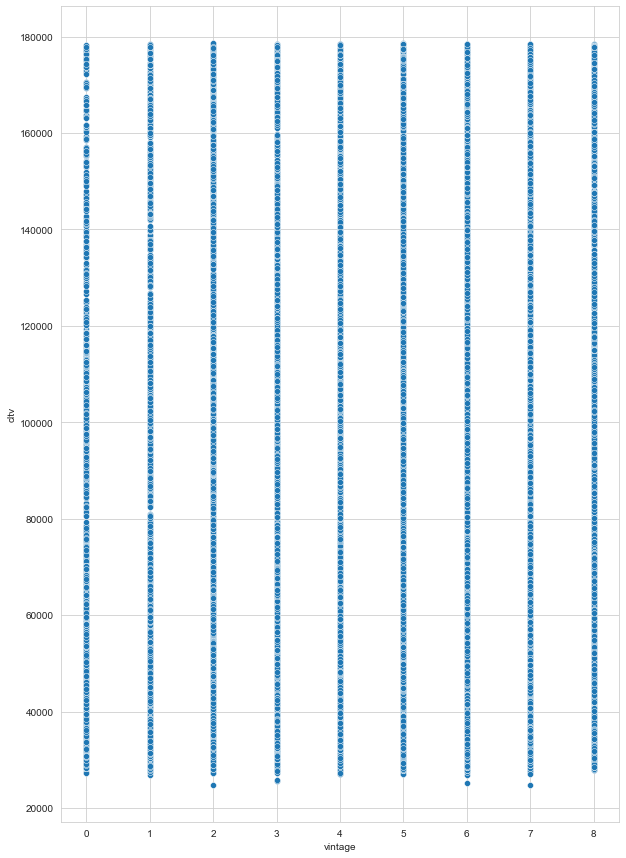

In [46]:
plt.rcParams["figure.figsize"]=(10,15)
sns.scatterplot(data=train, x="vintage", y="cltv")

In [47]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [49]:
train_num['id'] = le.fit_transform(train_num['id'])
train_num['marital_status'] = le.fit_transform(train_num['marital_status'])
train_num['vintage'] = le.fit_transform(train_num['vintage'])
train_num['claim_amount'] = le.fit_transform(train_num['claim_amount'])

In [51]:
train_num.head(1)

,id,marital_status,vintage,claim_amount,cltv
0,0,1,5,3790,64308


In [52]:
train_cat.head(1)

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum


In [53]:
train_cat2 = pd.get_dummies(train_cat, columns = ['gender','area','qualification','income','num_policies',
                                               'policy','type_of_policy'])
train_cat2

,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
89388,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
89389,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
89390,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0


In [54]:
df_encoded_final = pd.concat([train_num,train_cat2],axis=1)
df_encoded_final.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,0,1,5,3790,64308,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,1,0,8,3080,515400,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,2,1,8,600,64212,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,3,0,7,0,97920,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,4,1,6,1509,59736,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0


In [55]:
df_correlation=df_encoded_final.corr()
df_correlation

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
id,1.000000,0.000171,-0.005824,0.003836,-0.004223,0.000215,-0.000215,-0.000073,0.000073,0.003358,-0.004620,0.003202,-0.004875,0.002228,-0.005243,0.004789,0.004105,-0.004105,0.000334,-0.001300,0.001462,0.000920,-0.005496,0.005552
marital_status,0.000171,1.000000,-0.011686,-0.119746,-0.077744,-0.070468,0.070468,0.048739,-0.048739,0.015744,-0.016921,0.003188,-0.051020,0.052987,-0.009521,-0.008394,0.082363,-0.082363,0.029833,-0.042759,0.016472,0.014407,-0.015609,0.004057
vintage,-0.005824,-0.011686,1.000000,0.008909,0.020608,-0.005827,0.005827,-0.001145,0.001145,0.027646,-0.023877,-0.008955,0.021922,-0.017905,0.005197,-0.003478,-0.050699,0.050699,-0.073758,0.094780,-0.023712,-0.001513,-0.009788,0.013016
claim_amount,0.003836,-0.119746,0.008909,1.000000,0.184585,-0.041220,0.041220,-0.431260,0.431260,-0.049534,0.063930,-0.036700,0.154495,-0.070152,0.078673,-0.117753,-0.150359,0.150359,0.147686,-0.162267,0.004687,0.009087,0.013204,-0.024555
cltv,-0.004223,-0.077744,0.020608,0.184585,1.000000,0.001318,-0.001318,-0.133107,0.133107,0.005511,0.013329,-0.046898,0.070761,-0.038249,0.021668,-0.039879,-0.360414,0.360414,0.035181,-0.058261,0.031613,0.008627,0.021295,-0.033617
gender_Female,0.000215,-0.070468,-0.005827,-0.041220,0.001318,1.000000,-1.000000,0.042516,-0.042516,-0.036120,0.034122,0.004402,0.015237,-0.032893,0.036624,0.012460,-0.052871,0.052871,0.007721,-0.003375,-0.007699,0.000745,-0.015893,0.017956
gender_Male,-0.000215,0.070468,0.005827,0.041220,-0.001318,-1.000000,1.000000,-0.042516,0.042516,0.036120,-0.034122,-0.004402,-0.015237,0.032893,-0.036624,-0.012460,0.052871,-0.052871,-0.007721,0.003375,0.007699,-0.000745,0.015893,-0.017956
area_Rural,-0.000073,0.048739,-0.001145,-0.431260,-0.133107,0.042516,-0.042516,1.000000,-1.000000,0.042854,-0.059079,0.041150,-0.204523,0.086828,-0.093010,0.159729,0.121898,-0.121898,-0.154533,0.176116,-0.014745,-0.013568,-0.014939,0.031046
area_Urban,0.000073,-0.048739,0.001145,0.431260,0.133107,-0.042516,0.042516,-1.000000,1.000000,-0.042854,0.059079,-0.041150,0.204523,-0.086828,0.093010,-0.159729,-0.121898,0.121898,0.154533,-0.176116,0.014745,0.013568,0.014939,-0.031046
qualification_Bachelor,0.003358,0.015744,0.027646,-0.049534,0.005511,-0.036120,0.036120,0.042854,-0.042854,1.000000,-0.919104,-0.185660,0.006930,-0.010869,-0.010141,0.010687,-0.023337,0.023337,-0.053618,0.080095,-0.034650,-0.020399,-0.019506,0.043201


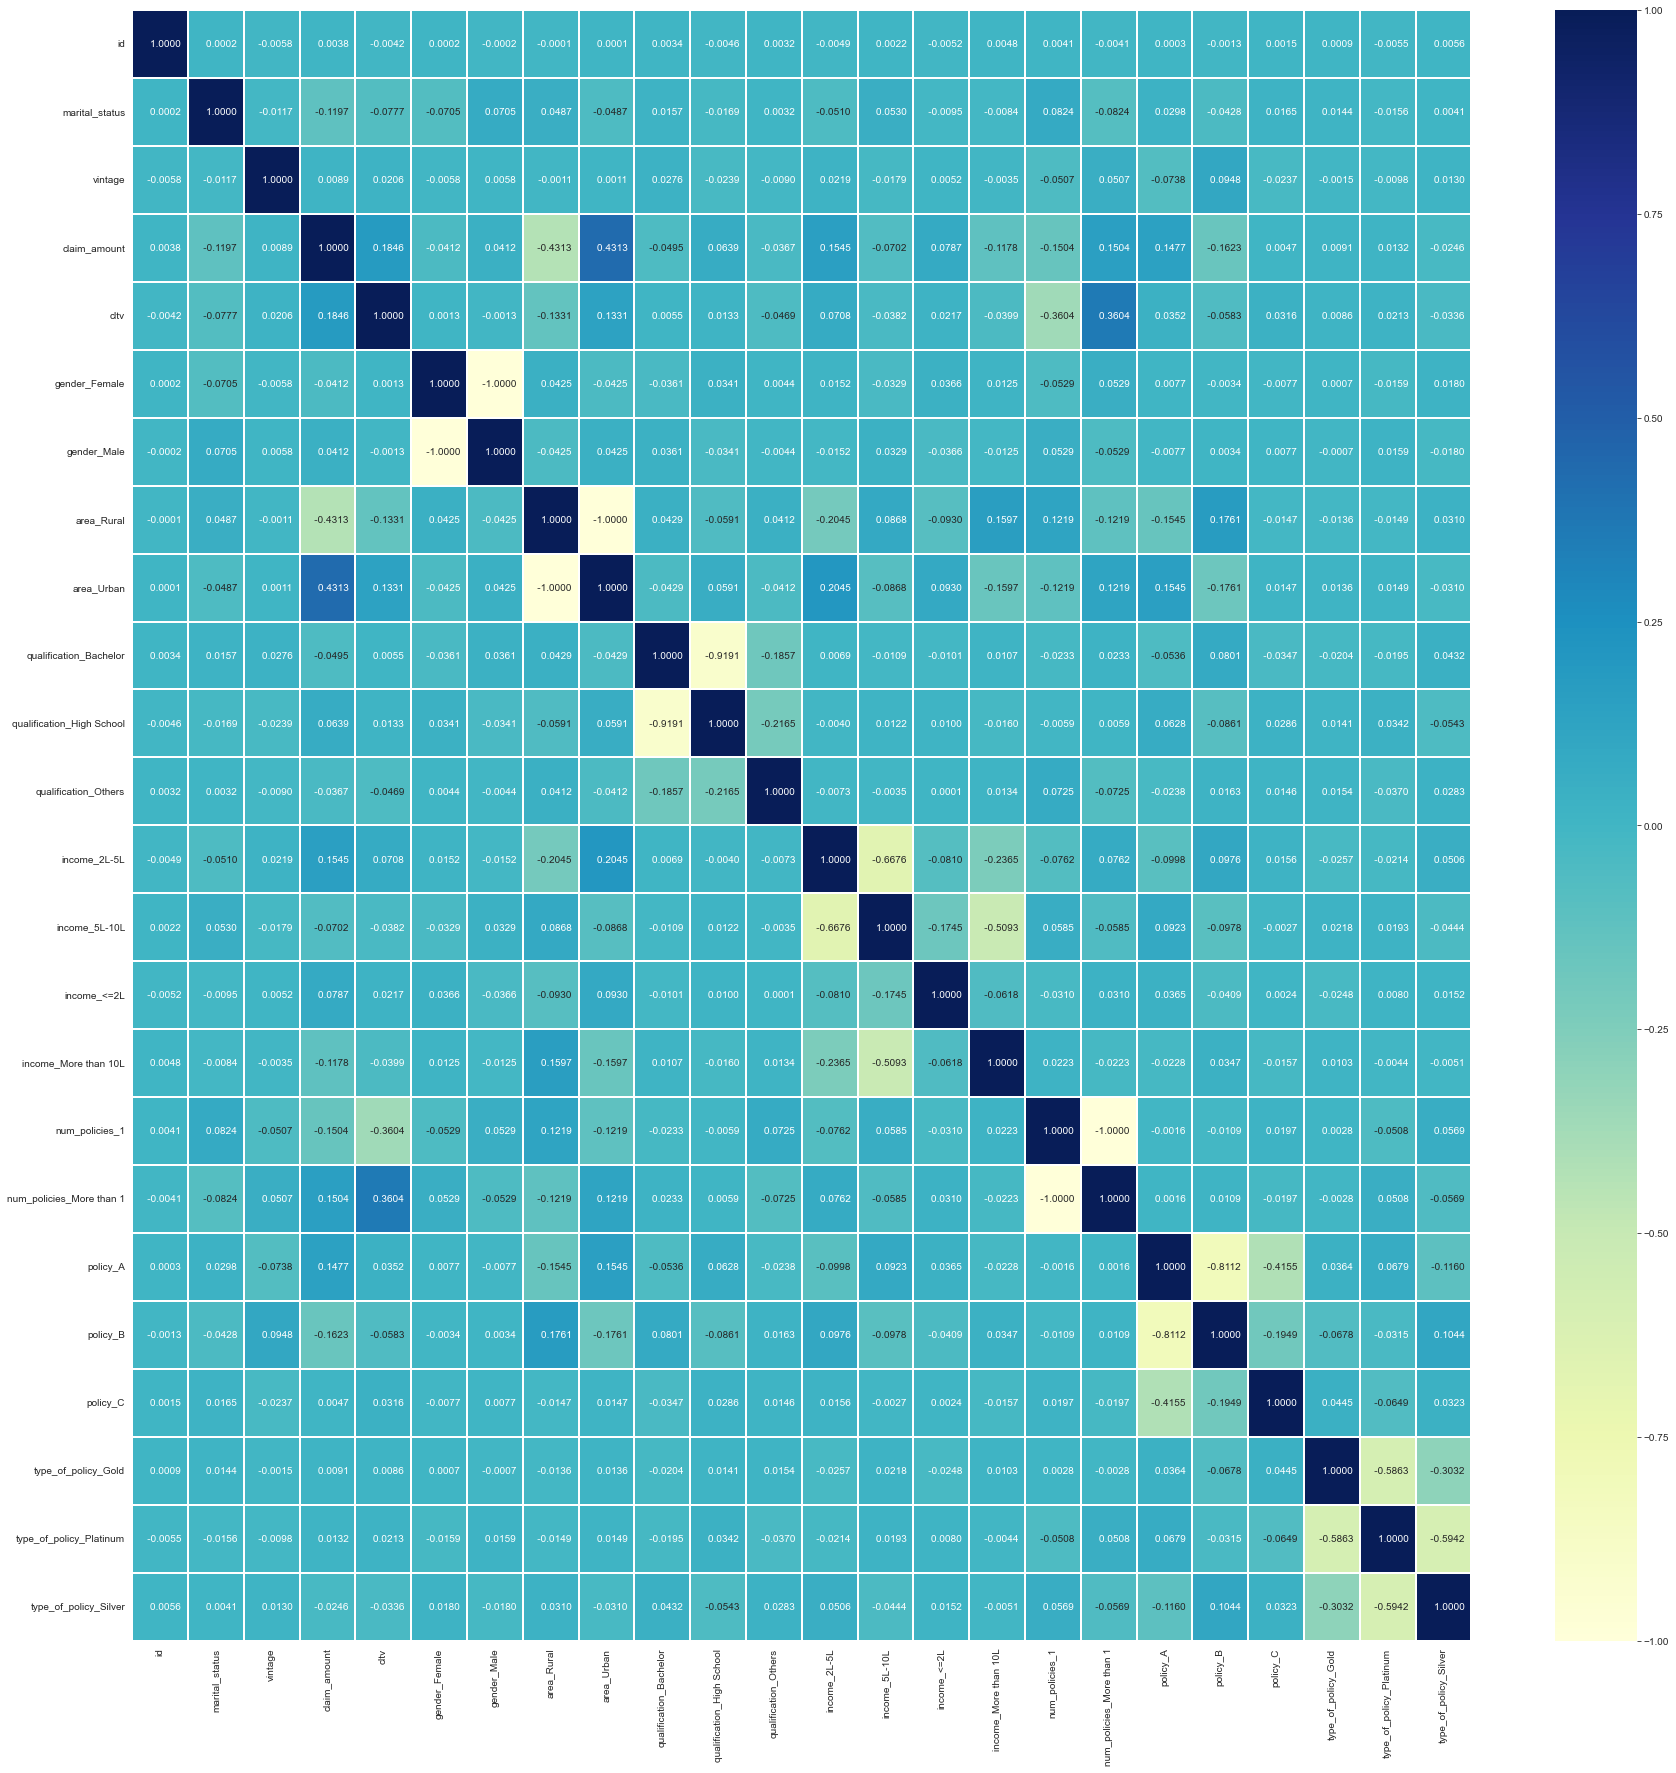

In [56]:
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_correlation, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()
#plt.figure(figsize=(20,20))
#sns.heatmap(flight.corr() , annot=True , cmap = 'YlGnBu')
#plt.show()

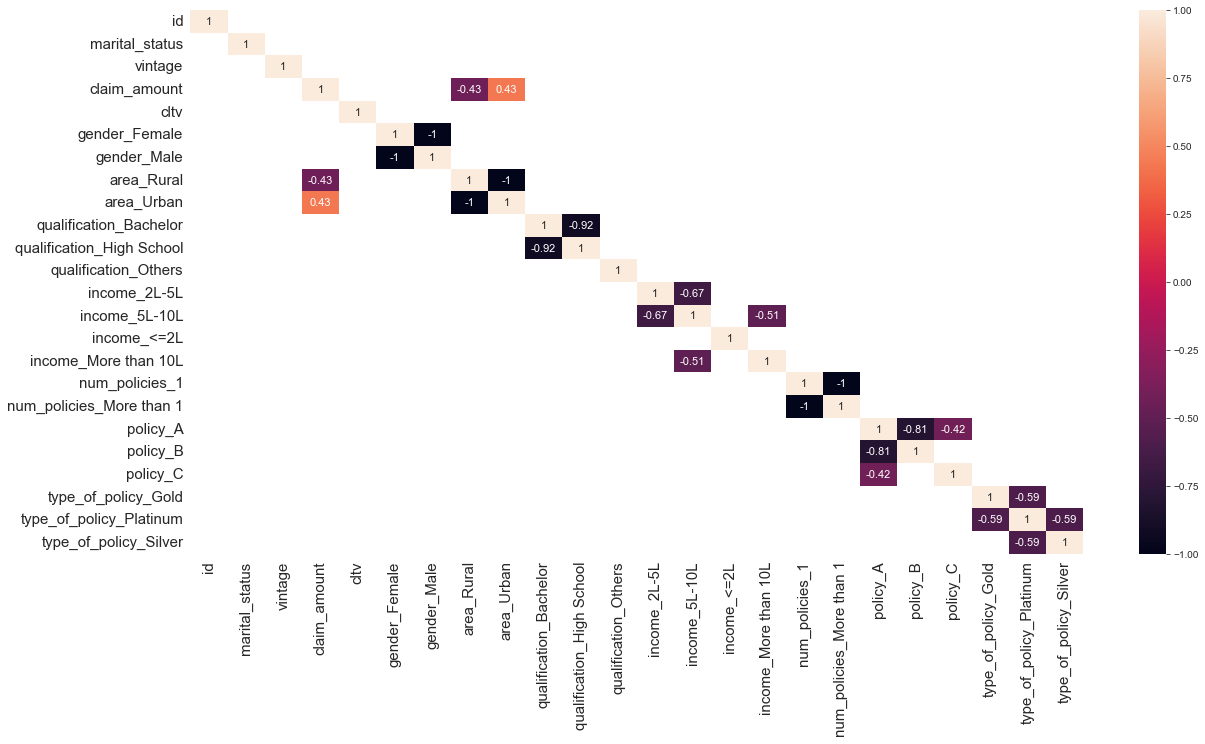

In [57]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_correlation[np.abs(df_correlation) > 0.4] ,annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [58]:
mean = np.mean(train)
std = np.std(train)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is id                44717.153507
marital_status        0.589700
vintage               4.585408
claim_amount       3936.869089
cltv              69655.172109
dtype: float64
std. deviation is id                25784.613059
marital_status        0.491888
vintage               2.295971
claim_amount       2753.619748
cltv              31450.117642
dtype: float64


In [60]:
print("Mean value of cltv",train.cltv.mean())
print("Standard deviation of cltv",train.cltv.std())
print("Minimum value of cltv",train.cltv.min())
print("Maximum value of cltv",train.cltv.max())

Mean value of cltv 69655.1721088963
Standard deviation of cltv 31450.32092006903
Minimum value of cltv 24828
Maximum value of cltv 178560


QQ Plot

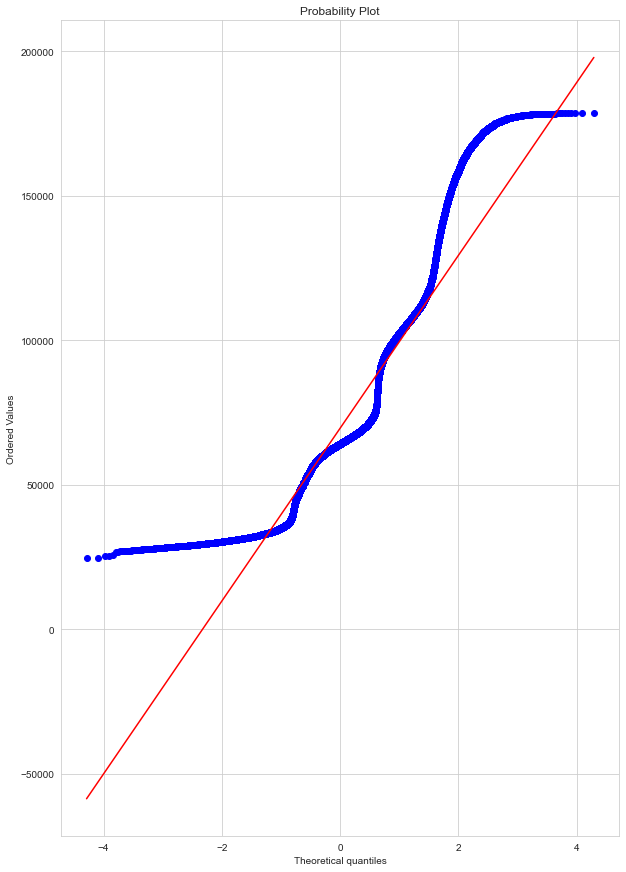

In [61]:
import pylab

import scipy.stats as stats

measurements = train['cltv']

stats.probplot(measurements, dist="norm", plot=pylab);

In [ ]:
#We can say that our cltv column is not Normally distributed

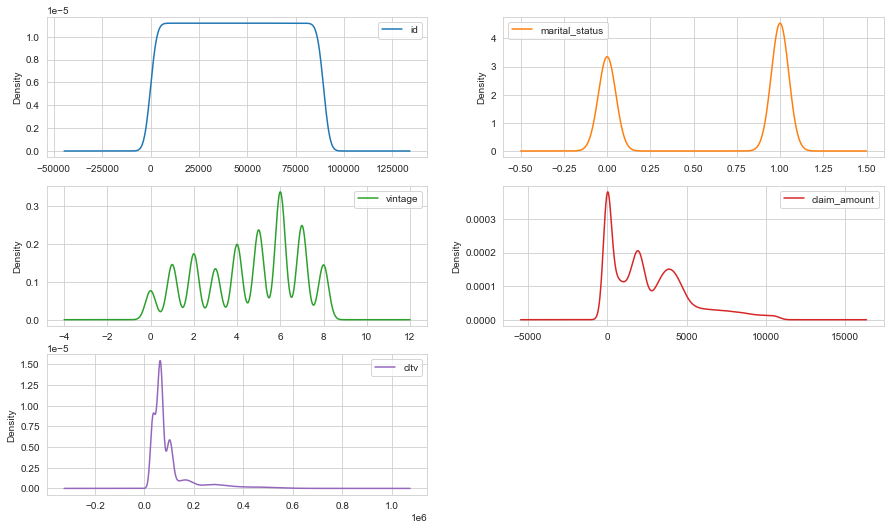

In [62]:
plt.rcParams["figure.figsize"] = [15,15]

# plot density plot using plot()

# kind: set the type of plot

# subplots: indicates whether to plot subplot for each variable or a single line plot

# layout: specify the arrangement of the subplots

# sharex: indicates whether to have the same scale on x-axis of all subplots

train_num.plot(kind = 'density', subplots = True, layout = (5,2), sharex = False)

# show plot

plt.show()

# Feature Selection

In [63]:
X = df_encoded_final.drop(columns='cltv',axis=1)
y = df_encoded_final['cltv']

In [64]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import statsmodels.api as sm

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [65]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from scipy
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

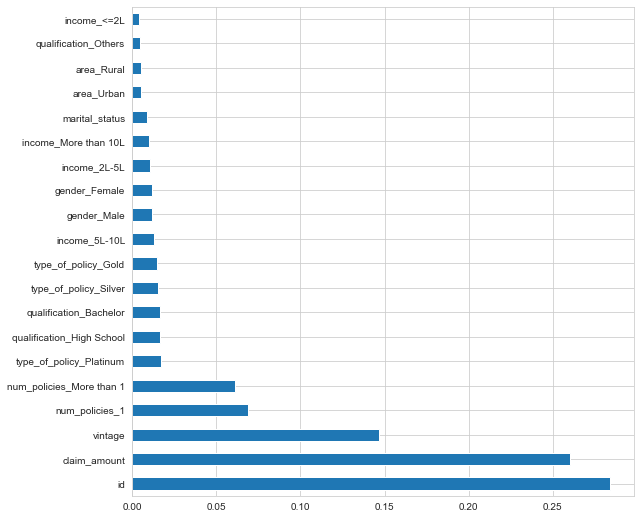

In [67]:
plt.figure(figsize=(9,9))

feat = pd.Series(etr.feature_importances_ , index=X.columns)
feat.nlargest(20).plot(kind='barh')

plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

In [69]:
import scipy.stats as stats

Statistical test to prove the data is split into 70:30

In [70]:
stats.ttest_ind(X,X_train)

Ttest_indResult(statistic=array([ 0.00637013,  0.59116342,  0.45362942,  0.0843008 ,  0.18968975,
       -0.18968975, -0.00352806,  0.00352806,  0.27474339, -0.00954029,
       -0.65471971,  0.50039899, -0.2808231 , -0.07452048, -0.17724077,
       -0.26751799,  0.26751799,  0.3286324 , -0.23177895, -0.19058392,
       -0.47195286,  0.37704336,  0.02536717]), pvalue=array([0.99491742, 0.55441176, 0.65009619, 0.93281738, 0.8495525 ,
       0.8495525 , 0.99718503, 0.99718503, 0.78351374, 0.99238808,
       0.51264917, 0.61679485, 0.77884645, 0.94059634, 0.85931949,
       0.78907071, 0.78907071, 0.74243398, 0.81671   , 0.84885183,
       0.63696108, 0.70614188, 0.97976213]))

In [71]:
stats.ttest_ind(X,X_test)

Ttest_indResult(statistic=array([-0.01560704, -1.44875046, -1.11311859, -0.20617622, -0.4645659 ,
        0.4645659 ,  0.00864177, -0.00864177, -0.67284021,  0.02336813,
        1.61720801, -1.22358152,  0.68765871,  0.18278732,  0.43455158,
        0.65562834, -0.65562834, -0.80537031,  0.56809339,  0.46752813,
        1.15796962, -0.92367593, -0.06212935]), pvalue=array([0.98754792, 0.14741021, 0.26565999, 0.83665365, 0.6422433 ,
       0.6422433 , 0.99310497, 0.99310497, 0.5010504 , 0.98135667,
       0.10583633, 0.22111282, 0.49166921, 0.85496524, 0.66388882,
       0.5120647 , 0.5120647 , 0.42060781, 0.56997275, 0.64012302,
       0.24687901, 0.35565714, 0.95045994]))

In [72]:
df_encoded_final.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,0,1,5,3790,64308,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,1,0,8,3080,515400,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,2,1,8,600,64212,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,3,0,7,0,97920,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,4,1,6,1509,59736,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0


In [73]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_encoded_final

# display the first five observations
df_numeric_features_vif.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,0,1,5,3790,64308,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,1,0,8,3080,515400,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,2,1,8,600,64212,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,3,0,7,0,97920,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,4,1,6,1509,59736,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0


In [74]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,income_2L-5L
1,inf,income_5L-10L
2,inf,type_of_policy_Platinum
3,inf,type_of_policy_Gold
4,inf,policy_C
5,inf,policy_B
6,inf,policy_A
7,inf,num_policies_More than 1
8,inf,num_policies_1
9,inf,income_More than 10L


In [75]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                   Features
0     3.507293                         id
1     2.250104             marital_status
2     4.336079                    vintage
3     2.759925               claim_amount
4     2.526928                       cltv
5     2.241757                gender_Male
6     3.926671                 area_Urban
7     2.071616  qualification_High School
8     1.086876       qualification_Others
9     2.926744              income_5L-10L
10    1.079623                income_<=2L
11    1.503661       income_More than 10L
12    3.431531   num_policies_More than 1
13    1.481318                   policy_B
14    1.143711                   policy_C
15    1.408850        type_of_policy_Gold
16    1.421621      type_of_policy_Silver


In [ ]:
df_numeric_features_vif.head()

# MLR Full Model

In [76]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   cltv   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     819.5
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:23:16   Log-Likelihood:            -9.1181e+05
No. Observations:               71513   AIC:                         1.824e+06
Df Residuals:                   71496   BIC:                         1.824e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
id                    

R squared shows how well the regression model explains observed data

In [77]:
y_pred = MLR_full_model.predict(X_test)

In [78]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_signi_var'
X_signi_var = df_numeric_features_vif.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_signi_var'
y_signi_var = y.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_signi_var = sm.add_constant(X_signi_var)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_signi_var, X_test_signi_var, y_train_signi_var, y_test_signi_var = train_test_split(X_signi_var, y_signi_var, 
                                                                                            random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_signi_var', X_train_signi_var.shape)
print('y_train_signi_var', y_train_signi_var.shape)

# print dimension of test set
print('X_test_signi_var', X_test_signi_var.shape)
print('y_test_signi_var', y_test_signi_var.shape)

X_train_signi_var (71513, 18)
y_train_signi_var (71513,)
X_test_signi_var (17879, 18)
y_test_signi_var (17879,)


In [79]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model_vif = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

# print the summary output
print(MLR_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                   cltv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.068e+33
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:23:28   Log-Likelihood:             1.5030e+06
No. Observations:               71513   AIC:                        -3.006e+06
Df Residuals:                   71495   BIC:                        -3.006e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [80]:
# calculate p-values for all the independent variables in the MLR_model
# create a dataframe containing p-values 
# pass the column name to the parameter 'columns'
MLR_pvalues = pd.DataFrame(MLR_model_vif.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000e+00
id,1.799118e-108
marital_status,1.984673e-33
vintage,0.000000e+00
claim_amount,1.258942e-09
cltv,0.000000e+00
gender_Male,6.272390e-35
area_Urban,5.034831e-02
qualification_High School,3.068079e-02
qualification_Others,1.754433e-16


In [81]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['area_Urban', 'income_<=2L', 'num_policies_More than 1']

In [82]:
# drop the insignificant variables from the dataframe 'X_train_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_train_signi_var = X_train_signi_var.drop(insigni_var, axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_test_signi_var = X_test_signi_var.drop(insigni_var, axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                   cltv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.213e+33
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:23:58   Log-Likelihood:             1.5590e+06
No. Observations:               71513   AIC:                        -3.118e+06
Df Residuals:                   71498   BIC:                        -3.118e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Predict the test set results

In [109]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [110]:
y_pred=ml.predict(X_test)
print(y_pred)

[ 37203.52275152 107044.54877716 115999.35527958 ...  76419.62196303
  45770.25077578 107118.73964072]


# Evaluate the model

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.14753246644743512

Text(0.5, 1.0, 'Actual vs. Predicted')

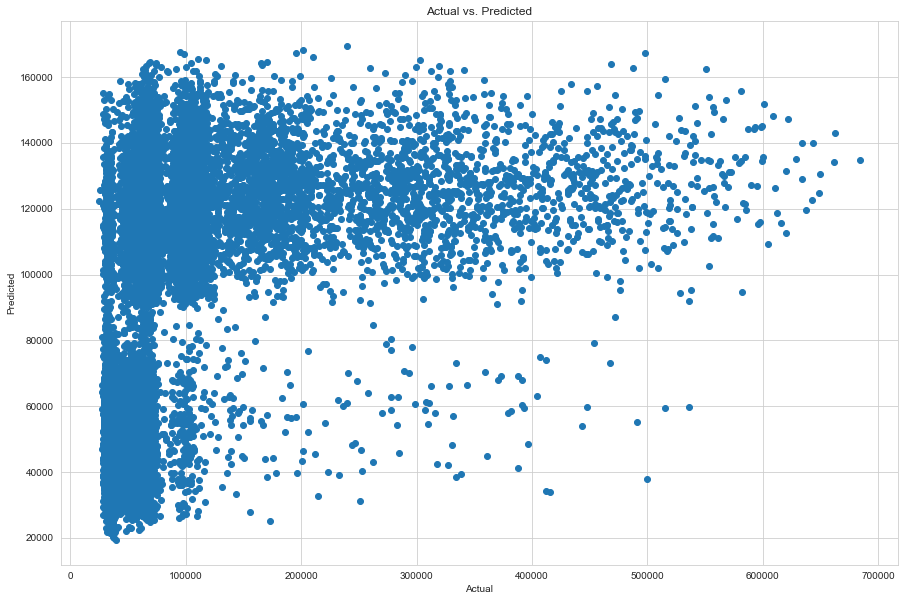

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

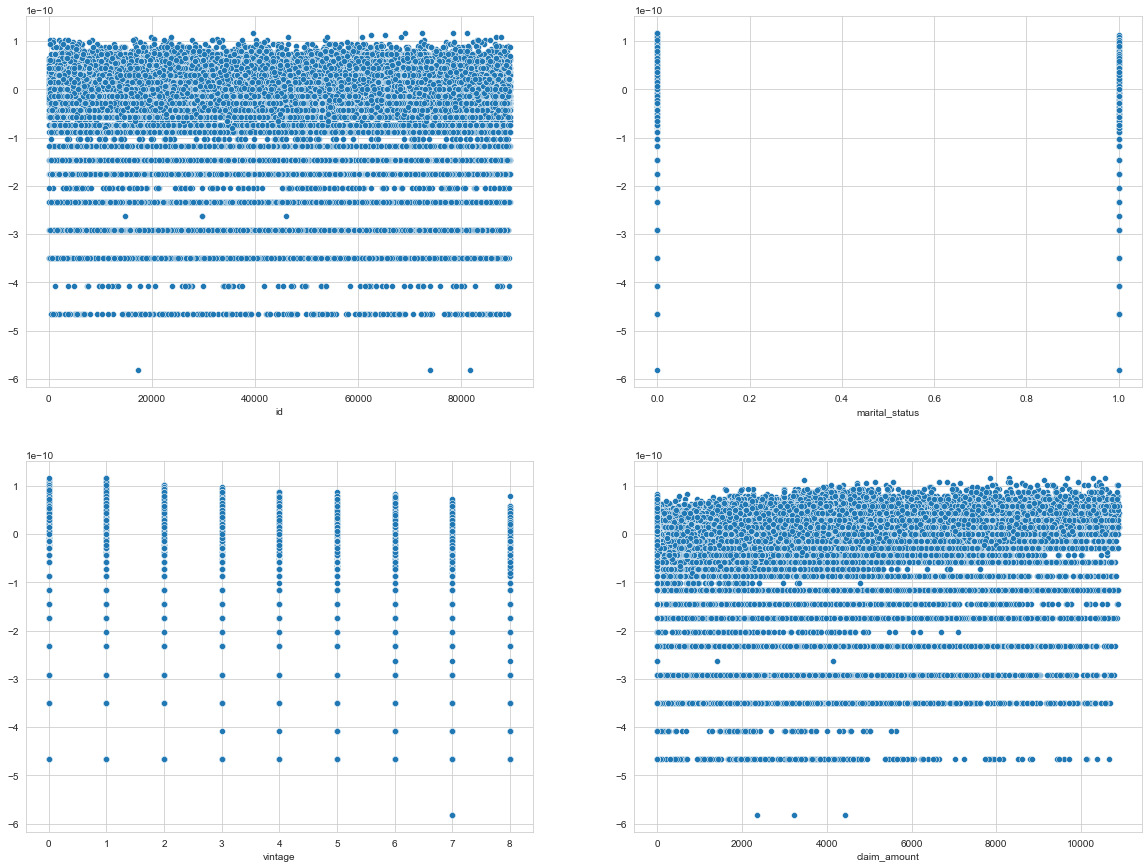

In [83]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_signi_var.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train_signi_var[variable], MLR_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

In [113]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
52276,38676,37203.522752,1472.477248
70721,100644,107044.548777,-6400.548777
62737,136344,115999.355280,20344.644720
36028,56304,140310.951594,-84006.951594
2425,70716,135985.190927,-65269.190927
18130,101592,131555.793088,-29963.793088
46361,58344,44526.551037,13817.448963
84033,200868,139323.901212,61544.098788
45118,107712,128676.872682,-20964.872682
9104,60828,118964.996161,-58136.996161


# Random Forest Model

In [84]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

In [85]:
print(X_train.shape[0]/len(train)*100)
print(X_test.shape[0]/len(train)*100)
print(y_train.shape[0]/len(train)*100)
print(y_test.shape[0]/len(train)*100)

92.44422037798289
23.112024612839008
92.44422037798289
23.112024612839008


Hence Statistically proved that data is splitted into 80:20

In [86]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [87]:
pred = rfr.predict(X_test)

In [88]:
rfr.score(X_train , y_train)

0.8727277921349113

In [89]:
rfr.score(X_test , y_test)

0.08240755483967355

<AxesSubplot:xlabel='cltv', ylabel='Density'>

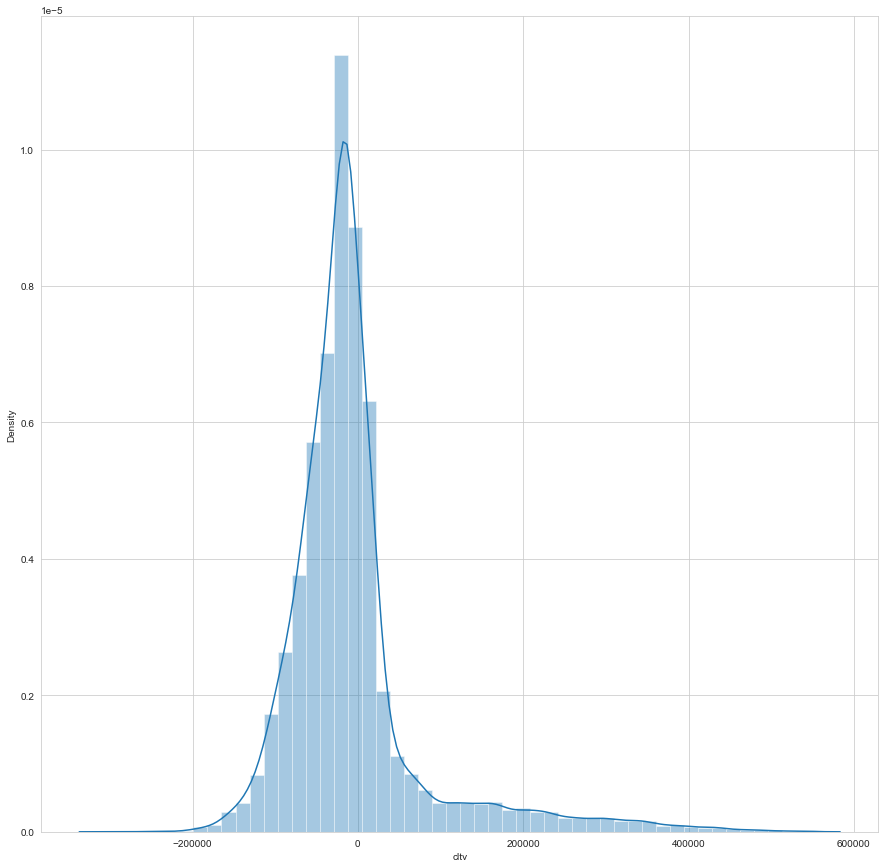

In [90]:
sns.distplot(y_test - pred)

Text(0, 0.5, 'pred')

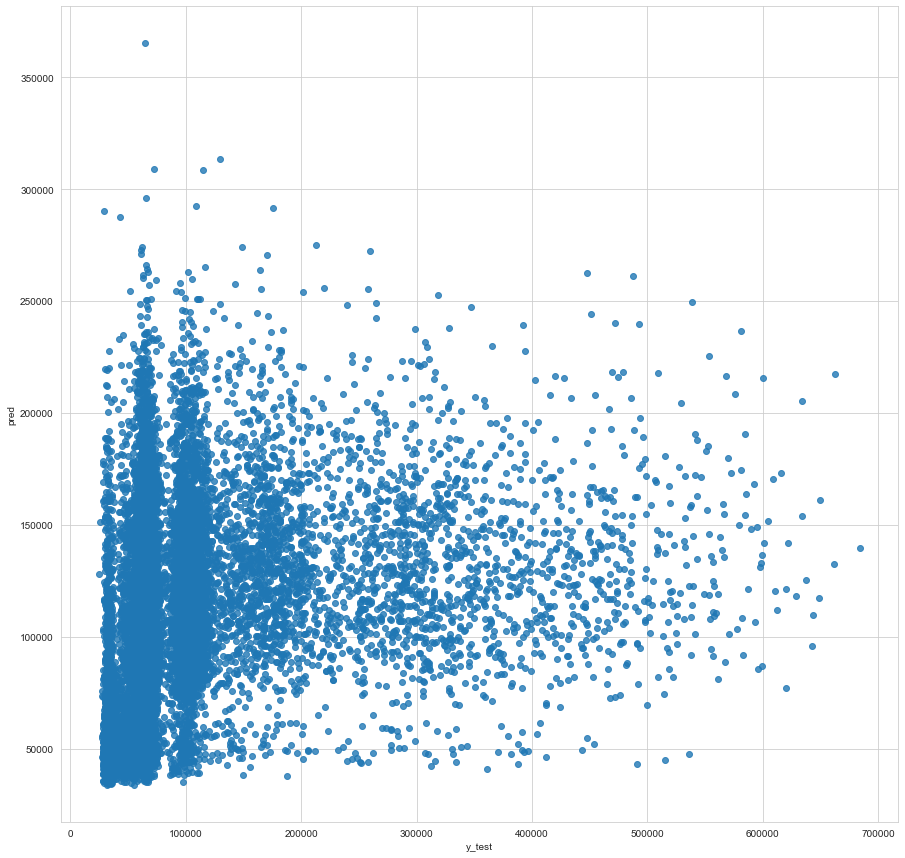

In [91]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 54521.521496728
MSE: 7460460625.17772
RMSE: 86373.95802658184


In [93]:
metrics.r2_score(y_test,pred)

0.08240755483967355

# Hyperparameter tuning

In [94]:
n_estimators = [int(x) for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features=['sqrt','log2','auto',None]

random_search = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    
}

random_search

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [97]:
rfr_random = RandomizedSearchCV(estimator=rfr , param_distributions=random_search , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)

In [99]:
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 1.6min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 1.6min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 1.6min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 1.5min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 1.4min
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time= 4.4min
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time= 2.0min
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [101]:
rfr_random.best_params_

{'n_estimators': 1366,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 1577}

In [102]:
prediction = rfr_random.predict(X_test)

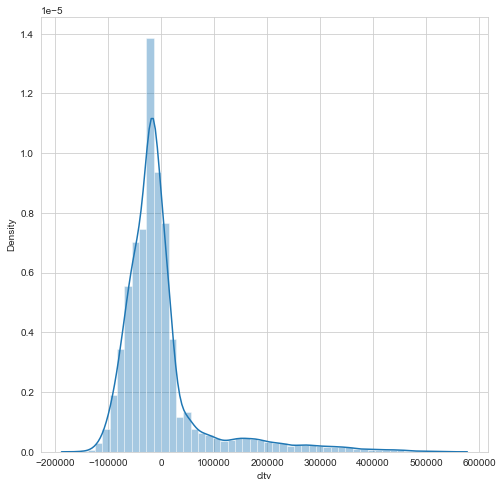

In [103]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'pred')

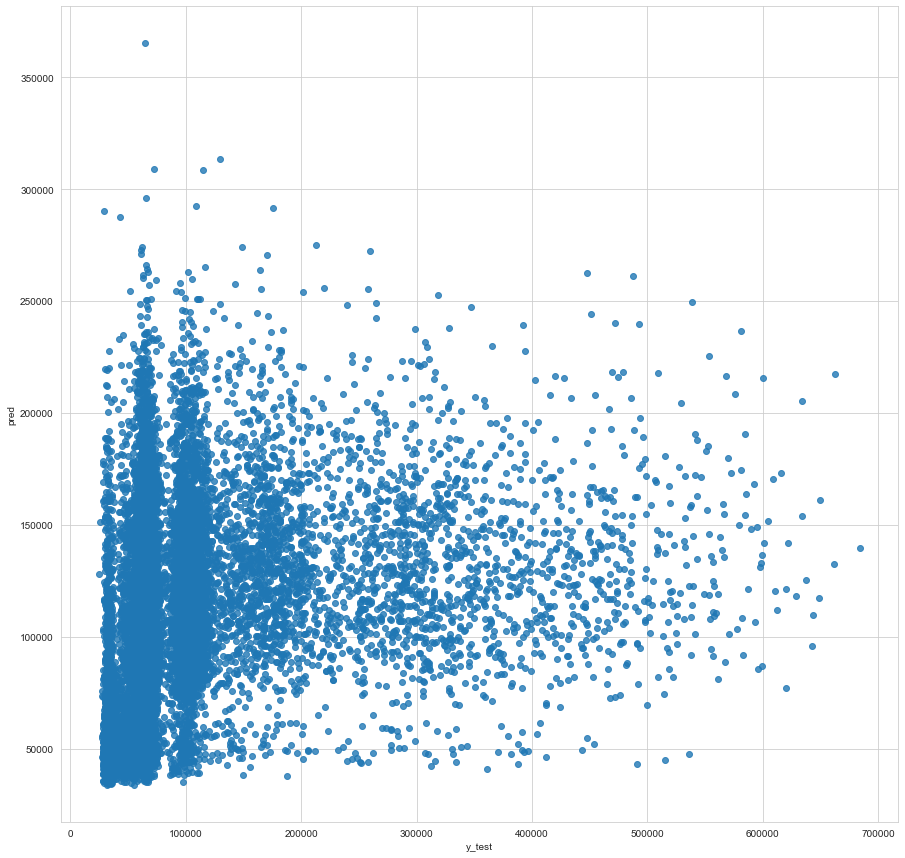

In [104]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 50635.449759344956
MSE: 6938540427.96903
RMSE: 83297.90170207788


In [106]:
metrics.r2_score(y_test,prediction)

0.1466006461240167